In [7]:
from pathlib import Path
print("CWD:", Path.cwd())  # verás .../EdgeAI-SmartIrrigationSystem

CWD: /Users/victorlopez/EdgeAI-SmartIrrigationSystem


In [11]:
import pandas as pd

df = pd.read_csv("firmware/data/dataset_clean.csv")

print("Columnas del CSV:")
print(df.columns.tolist())
print("\nPrimeras filas del dataset:")
df.head()

Columnas del CSV:
['created_at', 'entry_id', 'field1', 'field2', 'field3', 'field4', 'field5', 'field6', 'latitude', 'longitude', 'elevation', 'status']

Primeras filas del dataset:


,created_at,entry_id,field1,field2,field3,field4,field5,field6,latitude,longitude,elevation,status
0,2025-10-23T15:38:53+00:00,1,450,520,22.8,46.5,300,1,NaN,NaN,NaN,NaN
1,2025-10-23T15:39:10+00:00,2,450,520,22.8,46.5,300,1,NaN,NaN,NaN,NaN
2,2025-10-23T15:39:26+00:00,3,450,520,22.8,46.5,300,1,NaN,NaN,NaN,NaN
3,2025-10-23T15:39:42+00:00,4,450,520,22.8,46.5,300,1,NaN,NaN,NaN,NaN
4,2025-10-23T15:39:59+00:00,5,450,520,22.8,46.5,300,1,NaN,NaN,NaN,NaN


# --- Cleaning and renaming columns from ThingSpeak export ---


In [12]:
# Map from ThingSpeak default field names to descriptive feature names
rename_map = {
    'field1': 'soil1',
    'field2': 'soil2',
    'field3': 'temp_c',
    'field4': 'humidity',
    'field5': 'light',
    'field6': 'decision'
}

# Rename existing columns using the map above
df = df.rename(columns={k: v for k, v in rename_map.items() if k in df.columns})

# Keep only the relevant columns for TinyML
cols = ['soil1', 'soil2', 'temp_c', 'humidity', 'light', 'decision']
df = df[cols]

# Convert all values to numeric (ignore errors -> convert to NaN)
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
df = df.dropna()

# Print summary of the cleaned dataset
print("Columns after cleaning:")
print(df.columns.tolist())
print("Dataset shape:", df.shape)
df.head()

Columns after cleaning:
['soil1', 'soil2', 'temp_c', 'humidity', 'light', 'decision']
Dataset shape: (5689, 6)


,soil1,soil2,temp_c,humidity,light,decision
0,450,520,22.8,46.5,300,1
1,450,520,22.8,46.5,300,1
2,450,520,22.8,46.5,300,1
3,450,520,22.8,46.5,300,1
4,450,520,22.8,46.5,300,1


# --- Basic Exploratory Data Analysis (EDA) ---

=== Descriptive statistics ===


,soil1,soil2,temp_c,humidity,light,decision
count,5689.000000,5689.000000,5689.000000,5689.000000,5689.000000,5689.000000
mean,596.208121,582.868870,23.998330,54.975303,549.068202,0.730005
std,89.210900,89.190529,3.411232,11.416117,201.700110,0.443996
min,450.000000,430.000000,18.000000,35.000000,200.000000,0.000000
25%,519.000000,508.000000,21.100000,45.600000,371.000000,0.000000
50%,596.000000,580.000000,23.900000,54.800000,553.000000,1.000000
75%,674.000000,662.000000,26.900000,64.800000,724.000000,1.000000
max,749.000000,739.000000,29.900000,74.900000,899.000000,1.000000



=== Label distribution (decision) ===
decision
1    73.0%
0    27.0%
Name: proportion, dtype: object

=== Feature distributions ===


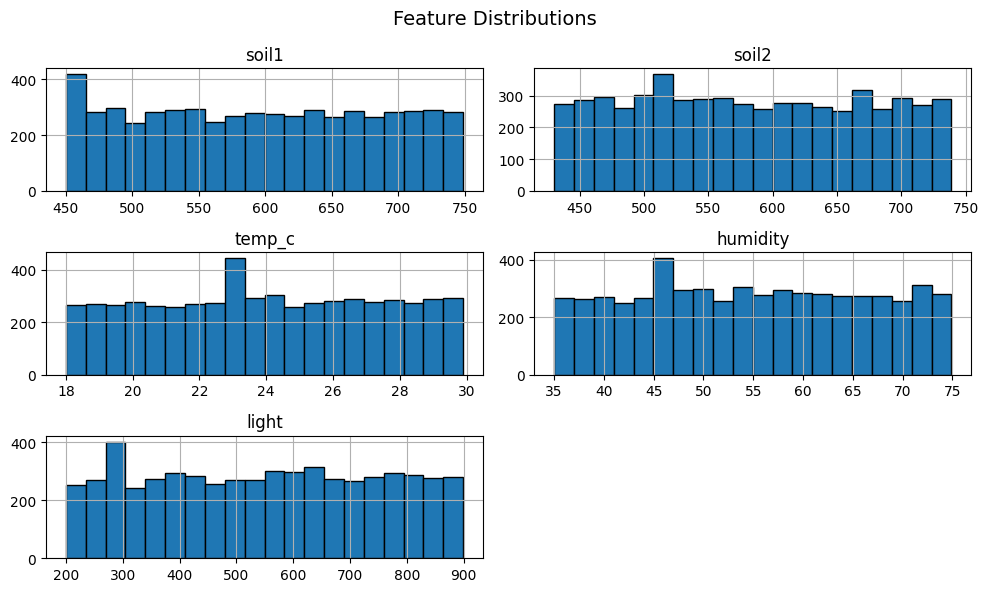


=== Correlation matrix ===


,soil1,soil2,temp_c,humidity,light,decision
soil1,1.000000,0.016549,-0.007942,0.036441,0.060212,0.496728
soil2,0.016549,1.000000,0.014334,0.010120,0.019934,0.455957
temp_c,-0.007942,0.014334,1.000000,0.001815,-0.010661,-0.005661
humidity,0.036441,0.010120,0.001815,1.000000,0.030541,-0.013619
light,0.060212,0.019934,-0.010661,0.030541,1.000000,-0.014765
decision,0.496728,0.455957,-0.005661,-0.013619,-0.014765,1.000000


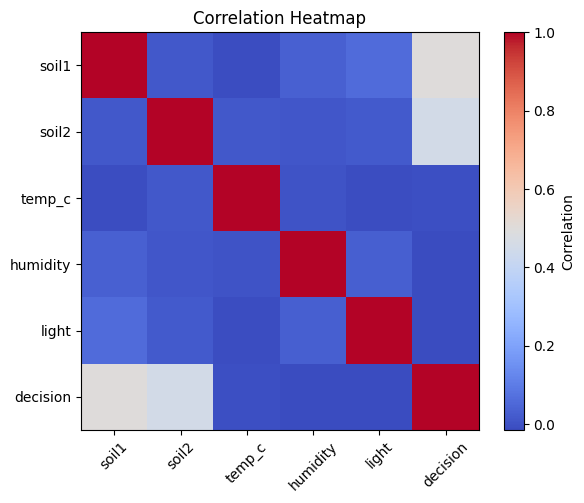

In [14]:
# Summary statistics for each numerical feature
print("=== Descriptive statistics ===")
display(df.describe())

# Check class distribution for the target variable (TinyML label)
print("\n=== Label distribution (decision) ===")
label_dist = df['decision'].value_counts(normalize=True) * 100
print(label_dist.round(2).astype(str) + "%")

# Histograms for each sensor feature
print("\n=== Feature distributions ===")
import matplotlib.pyplot as plt

features = ['soil1', 'soil2', 'temp_c', 'humidity', 'light']
df[features].hist(bins=20, figsize=(10, 6), edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.tight_layout()
plt.show()

# Correlation matrix
print("\n=== Correlation matrix ===")
corr = df[['soil1', 'soil2', 'temp_c', 'humidity', 'light', 'decision']].corr(numeric_only=True)
display(corr)

plt.figure(figsize=(6, 5))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr.columns)), list(corr.columns), rotation=45)
plt.yticks(range(len(corr.columns)), list(corr.columns))
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()